# 26 Sep 23 - Activity: Electrostatic Fields

As we saw the electric field is described by the 4 Maxwell equations. But, in the electrostatic situation where the charges do not move, we find the electric field is described by the following equations:

$$\nabla \cdot \mathbf{E} = \frac{\rho}{\epsilon_0}$$

$$\nabla \times \mathbf{E} = 0$$

These linear partial differential equations can be solved analytically for a number of situations. In this activity we will explore the electric field for a number of situations. 

## The del operator

The del operator ($\nabla$) is a differential vector operator that can act in the same way that vectors do (i.e., through a dot $\cdot$ or cross $\times$ product). In addition, it can operate on a scalar function to produce a vector function (i.e., $\mathbf{E}(x,y,z) = - \nabla V(x,y,z)$). The operator itself is given by:

$$\nabla = \hat{x} \frac{\partial}{\partial x} + \hat{y} \frac{\partial}{\partial y} + \hat{z} \frac{\partial}{\partial z}$$

where $\hat{x}$, $\hat{y}$, and $\hat{z}$ are the unit vectors in the $x$, $y$, and $z$ directions, respectively. It acts on a scalar function $f(x,y,z)$ as follows:

$$\nabla f(x,y,z) = \hat{x} \frac{\partial f}{\partial x} + \hat{y} \frac{\partial f}{\partial y} + \hat{z} \frac{\partial f}{\partial z}$$

When taking the dot product (the divergence) of a vector function $\mathbf{F}(x,y,z)$, it acts as follows:

$$\nabla \cdot \mathbf{F}(x,y,z) = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}$$

And finally, when taking the cross product (the curl) of a vector function $\mathbf{F}(x,y,z)$, it acts as follows:

$$\nabla \times \mathbf{F}(x,y,z) = \left( \frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z} \right) \hat{x} + \left( \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \hat{y} + \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \hat{z}$$

We rarely make use of the full form of these differential equations, instead solving them in restricted and highly symmetric cases (e.g., using Gauss's Law), computing directly the field contributed by infinitesimal charges (e.g., using Coulomb's Law), or using numerical methods (e.g., using summation or other techniques). 

Often, the most productive approach tends to be using electric potential (a scalar function), which we will discuss later.

In [2]:
## run to import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

## Coulomb's Law and the Electric Field

As you have encountered in the past, a generic expression for the electric field observed at location $\mathbf{r}$ due to a point charge $q$ at location $\mathbf{r}'$ is given by:

$$\mathbf{E} = \dfrac{q}{4\pi\epsilon_0} \dfrac{\mathbf{r} - \mathbf{r}'}{\left|\mathbf{r} - \mathbf{r}'\right|^3}$$

Notice that the electric field is a vector function of position and the differences that appear are vector ones:

$$\mathbf{r} - \mathbf{r}' = (x-x')\hat{x} + (y-y')\hat{y} + (z-z')\hat{z}$$

We can show that the general solution for the electric field due to a set of point charges is simply the [superposition](https://en.wikipedia.org/wiki/Superposition_principle) of the individual fields due to each charge:

$$\mathbf{E} = \sum_i \mathbf{E}_i = \sum_i \dfrac{q_i}{4\pi\epsilon_0} \dfrac{\mathbf{r} - \mathbf{r}_i}{\left|\mathbf{r} - \mathbf{r}_i\right|^3}$$

where $\mathbf{E}_i$ is the electric field due to the ith charge. 

### Visualization of the Electric Field

Below we have written a a function that computes the electric field for a point charge at a known location. We use a few different libraries and known functions that we have used in the past for dynamical systems. But we apply them to the electric field.


In [3]:

def electric_field(charge, x_points, y_points, x_charge=0, y_charge=0):
    k = 8.99e9  # Nm^2/C^2, Coulomb's constant
    
    # Initialize electric field components to zero
    E_x = np.zeros_like(x_points)
    E_y = np.zeros_like(y_points)
    
    # Calculate electric field components due to the point charge at each point on the grid
    for i in range(x_points.shape[0]):
        for j in range(y_points.shape[1]):
            r_x = x_points[i, j] - x_charge
            r_y = y_points[i, j] - y_charge
            r_magnitude = np.sqrt(r_x**2 + r_y**2)
            if r_magnitude != 0:  # Avoid division by zero
                r_unit_x = r_x / r_magnitude
                r_unit_y = r_y / r_magnitude
                E_x[i, j] = k * charge * r_unit_x / r_magnitude**2
                E_y[i, j] = k * charge * r_unit_y / r_magnitude**2
    
    return E_x, E_y

def plot_electric_field(X, Y, E_x, E_y, stream_color='b'):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # First Subplot - Quiver Plot
    axs[0].quiver(X, Y, E_x, E_y, scale=1e6, color='r')
    axs[0].set_title('Quiver Plot')
    axs[0].set_xlabel('x [m]')
    axs[0].set_ylabel('y [m]')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    axs[0].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Second Subplot - Stream Plot
    axs[1].streamplot(X, Y, E_x, E_y, color=stream_color, linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
    axs[1].set_title('Stream Plot')
    axs[1].set_xlabel('x [m]')
    axs[1].set_ylabel('y [m]')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    axs[1].grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Third Subplot - Color Scaled Quiver Plot
    magnitude = np.sqrt(E_x**2 + E_y**2)
    norm = Normalize(vmin=magnitude.min(), vmax=magnitude.max())
    cmap = cm.viridis
    colors = cmap(norm(magnitude.flatten()))
    axs[2].quiver(X.flatten(), Y.flatten(), E_x.flatten(), E_y.flatten(), color=colors, scale=1e6)
    axs[2].set_title('Color Scaled Quiver Plot')
    axs[2].set_xlabel('x [m]')
    axs[2].set_ylabel('y [m]')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    axs[2].grid(color='gray', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

### A point charge

Below, we plot the electric field in 2D of a single point charge. We are using several different representations of the electric field. Sometimes, some work better than others. The code we wrote, should be able to handle multiple point charges. And you will need to create a list of charges and their locations to investigate the field of multiple charges.

#### Positive Point Charge at the Origin

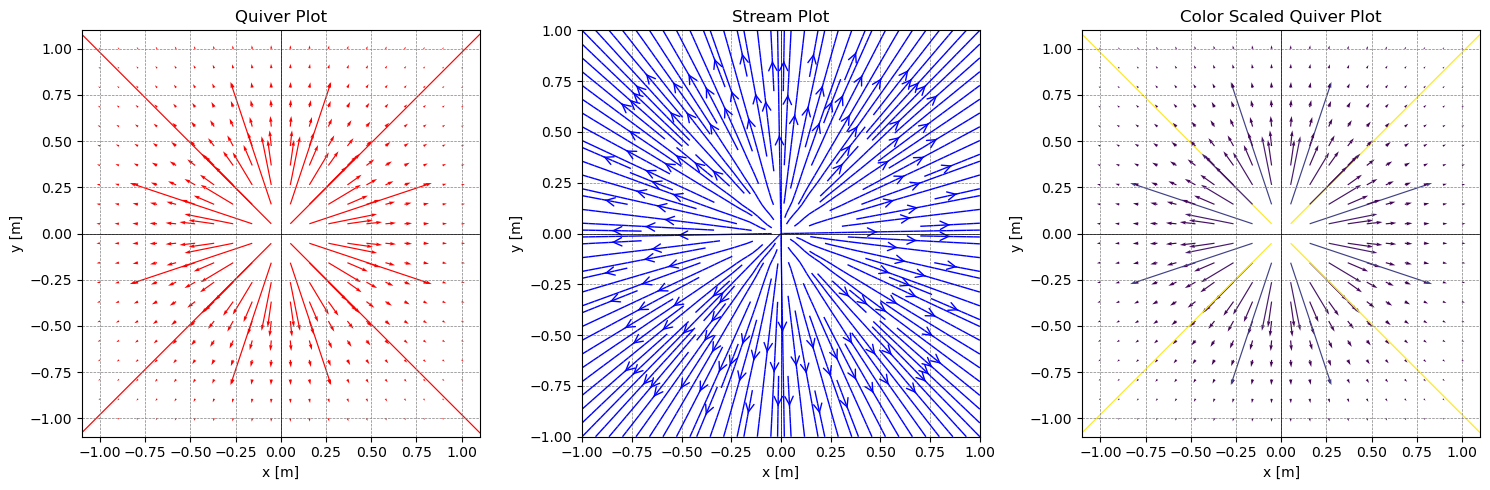

In [5]:
## Set Grid of Points
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A point charge
charge = 1e-6  # C

E_x, E_y = electric_field(charge, X, Y)
plot_electric_field(X, Y, E_x, E_y)

#### Negative Point Charge at the Origin

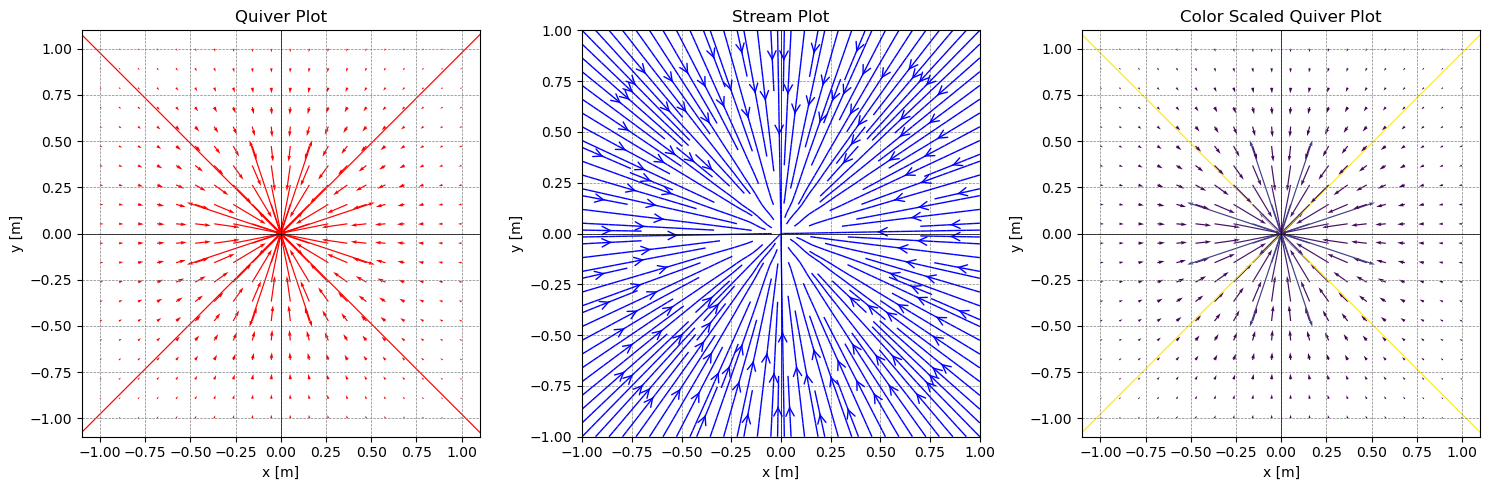

In [6]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A negative point charge
charge = -1e-6  # C

E_x, E_y = electric_field(charge, X, Y)
plot_electric_field(X, Y, E_x, E_y)

### The electric dipole

Now we can use these functions to place charges where we like and compute the total field. Below, we placed two oppositely signed charges to illustrate the field of an [electric dipole](https://en.wikipedia.org/wiki/Electric_dipole_moment). While not every distribution has an electric dipole moment, many do; especially those in water (as it's a polar molecule).

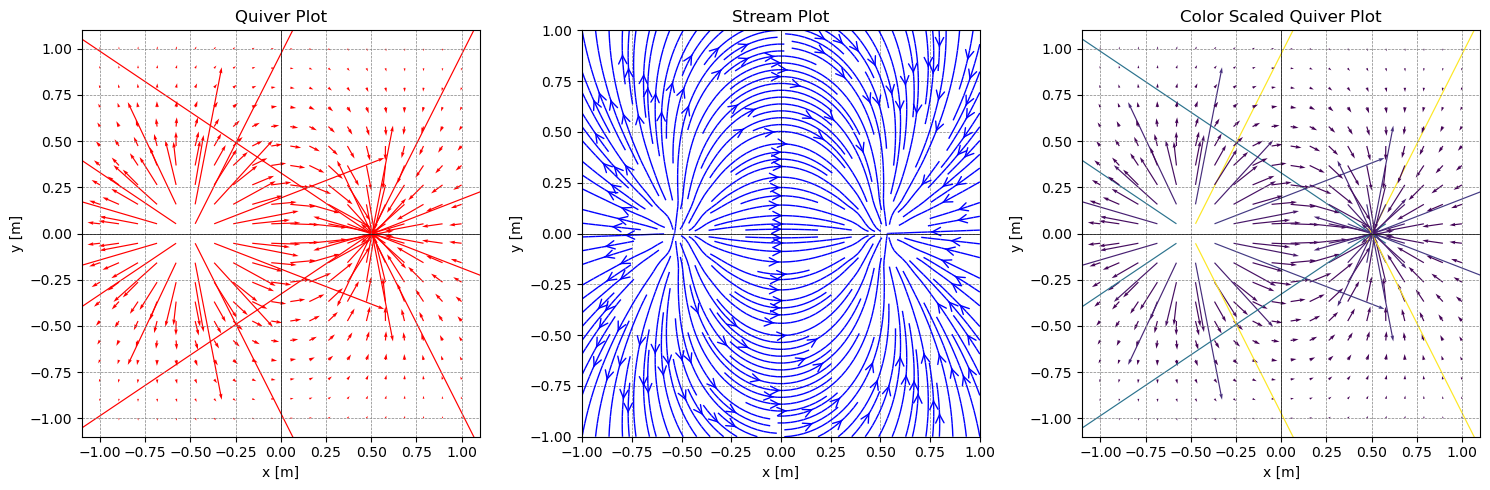

In [9]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)

## A positive point charge
charge1 = 1e-6  # C
x1 = -0.5  # m
y1 = 0  # m

## A negative point charge
charge2 = -1e-6  # C
x2 = 0.5  # m
y2 = 0  # m

E_1_x, E_1_y = electric_field(charge1, X, Y, x1, y1)
E_2_x, E_2_y = electric_field(charge2, X, Y, x2, y2)


## Find the net electric field in each direction
E_T_x = E_1_x + E_2_x
E_T_y = E_1_y + E_2_y

plot_electric_field(X, Y, E_T_x, E_T_y)

### Quadrupole

We will end this game with a list of charges that we can iterate through. This will help you develop more complicated distributions of charges. 

Below, we have a [quadrupole](https://en.wikipedia.org/wiki/Quadrupole). You can change the charges and their locations to see how the field changes. Your activity below is to develop several situations and see how the field changes and consider the symmetry of the field. For this we will make a [Python class](https://docs.python.org/3/tutorial/classes.html) for the charges. This will allow us to create a list of charges and iterate through them. This is showing an advantage of using aspects of [object oriented programming](https://en.wikipedia.org/wiki/Object-oriented_programming).

In [10]:
class Charge:
    def __init__(self, q, x, y):
        self.q = q  # charge value
        self.x = x  # x-coordinate
        self.y = y  # y-coordinate

# Creating instances of Charge class
charge1 = Charge(1e-6, -1, 1)  # e.g. Charge of 1 μC at (0, 0)
charge2 = Charge(-1e-6, 1, 1)  # e.g. Charge of -1 μC at (1, 0)
charge3 = Charge(1e-6, 1, -1)  # e.g. Charge of 1 μC at (0, 1)
charge4 = Charge(-1e-6, -1, -1)  # e.g. Charge of -1 μC at (1, 1)

# Storing instances in a list
charges = [charge1, charge2, charge3, charge4]

# Iterating over the list of charges
for charge in charges:
    print(f"Charge: {charge.q} C, Location: ({charge.x}, {charge.y})")

Charge: 1e-06 C, Location: (-1, 1)
Charge: -1e-06 C, Location: (1, 1)
Charge: 1e-06 C, Location: (1, -1)
Charge: -1e-06 C, Location: (-1, -1)


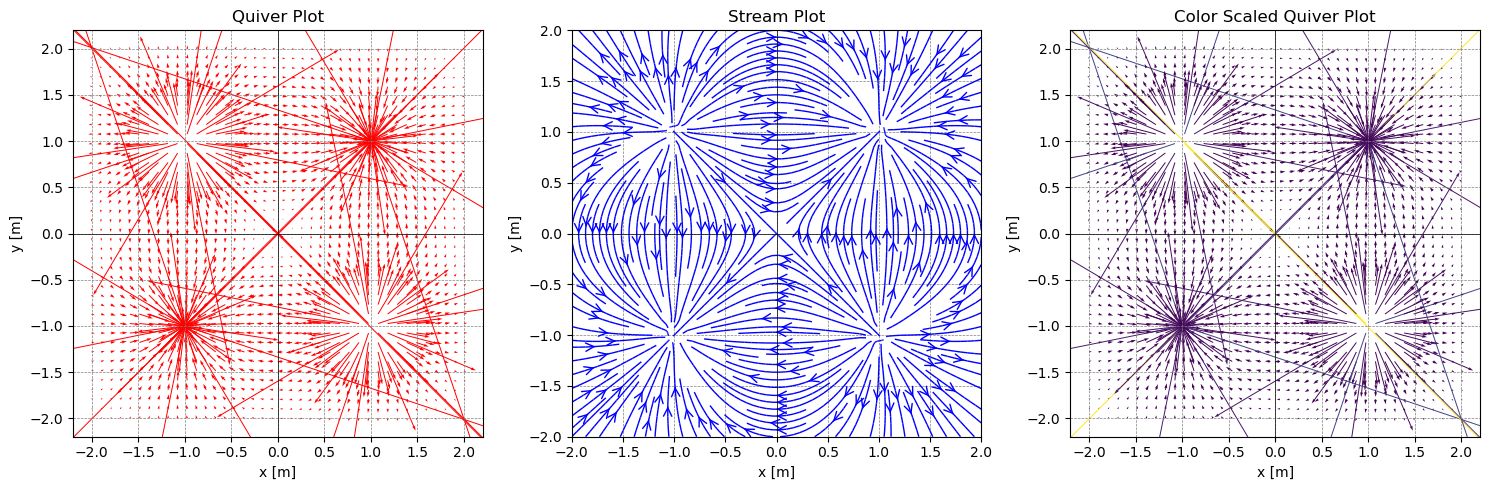

In [11]:
## Set up the space again
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)

## Set the total electric field to zero
E_T_x = np.zeros_like(X)
E_T_y = np.zeros_like(Y)

## Calculate the electric field due to each charge
for charge in charges:
    E_x, E_y = electric_field(charge.q, X, Y, charge.x, charge.y)
    E_T_x += E_x
    E_T_y += E_y

plot_electric_field(X, Y, E_T_x, E_T_y)

**&#9989; Do this** 

Now that we have built up some visualization codes. Let's make use of them. Create the following graphics and answer the following questions.

* Create a uniform line of charges. Make sure to include enough charges so that the field looks smooth. What is the symmetry of this situation. Where is the electric field constant (if at all)? Where is the electric field zero (if at all)?
* What if the line of charges varying their strength like a sinusoidal function?
* Create a circle of charges (like a ring). Is there any symmetry to this situation? Where is the electric field zero? How close does your calculation get to zero? What makes the calculation better or worse?
* Create a small locus of charges of different sizes and signs, but make sure the net charge is non-zero. How close do the charges need to be (or how far away do you need to be) for the field to look like a point charge field? What is the symmetry of this situation (or approximately so)? Where is the electric field zero (if at all)?

In [12]:
### Your code here

## Gauss's Law

Clearly Coulomb's Law gives us a prescription to solve most problems and serves as the basis for generic approaches to solving these problems. However, we can use the [divergence theorem](https://en.wikipedia.org/wiki/Divergence_theorem) with the first of the electrostatic equations above. This will convert this equation into a tool for solving highly symmetric problems. 

$$\int \int \int \nabla \cdot \mathbf{E}\;dV = \int \int \int \dfrac{\rho}{\epsilon_0} \;dV$$

The left hand side can be rewritten as:

$$\int \int \int \nabla \cdot \mathbf{E}\;dV = \iint \mathbf{E} \cdot d\mathbf{A}$$

where $d\mathbf{A}$ is an infinitesimal area element that has a vector direction. It points outward from the surface (normal to the local surface). We use this to write [Gauss's Law](https://en.wikipedia.org/wiki/Gauss%27s_law) for the electric field:

$$\iint \mathbf{E} \cdot d\mathbf{A} = \int \int \int \dfrac{\rho}{\epsilon_0}\;dV$$

Notice that this expression is always true, but it almost never useful for solving problems in general. The electric flux is often easily calculated considering the total enclosed charge:

$$\Phi_E = \int \int \int \dfrac{\rho}{\epsilon_0}\;dV = \dfrac{Q_{enc}}{\epsilon_0}$$

However, using that measure of the total electric flux to find the field is only possible in highly symmetric situations. For example, if we have a spherical charge distribution $\rho(r)$, we can use Gauss's Law to find the electric field at any point outside the sphere. Below, is a figure of a cylindrical charge distribution. We can use Gauss's Law to find the electric field at any point outside the cylinder because the charge per unit length is constant.

![Gaussian Cylinder](http://hyperphysics.phy-astr.gsu.edu/hbase/electric/imgele/gaucyl2.png)

### A charged cylinder

**&#9989; Do this** 


Consider a long and thin plastic cylinder with a radius of $R_0$ and length $L$, such that $L>>R_0$. The cylinder has a charge distribution that varies with radius $\rho(r) = cr^2$, where $c$ is a positive constant. Find the electric field inside and outside the cylinder using Gauss's Law. 

* Sketch the situation. What are the units of $c$?
* Prove to yourself and your group that you can use Gauss's Law to find the electric field inside and outside the cylinder (why? what assumptions are you making?)
* Compute the electric field and graph it's magnitude $|\mathbf{E}(r)|$ as a function of $r$ for $r \in [0,4R_0]$.

### Invent a planar problem

**&#9989; Do this**

It is very common to show that the electric field on a planar surface is given by:

$$\mathbf{E} = \dfrac{\sigma}{2\epsilon_0}$$

where $\sigma$ is the charge density on the surface (typically, $Q/A$). We can use Gauss's Law to find the electric field due to a charged plane. But, we want you to invent a problem for a thick plane of charge that has a varying charge density that depends on the distance from the center of the plane. 

1. Invent this problem and sketch it. Note here: $\rho(\mathbf{r}) = \rho(z)$ will still allow you to use Gauss's Law.
2. Solve for the electric field using Gauss's Law inside and outside the thick plane.

## Numerical Superposition - Coulomb's Law

We gave you code and a class structure that lets you develop solutions to 2D electrostatic problems. In fact, we built a simple numerical integrator that uses superposition in 2D to solve for the electric field. This works because the electric field obeys superposition. So we can add up the electric field due to each charge.

$$\mathbf{E} = \sum_i \mathbf{E}_i = \sum_i \dfrac{q_i}{4\pi\epsilon_0} \dfrac{\mathbf{r} - \mathbf{r}_i}{\left|\mathbf{r} - \mathbf{r}_i\right|^3}$$

In the continuous limit ($q \rightarrow \rho\;dV$), this becomes an integral that we can solve (sometimes). It depends on our ability to express the results in integrable functions:

$$\mathbf{E} = \int \int \int \dfrac{\rho(\mathbf{r}')}{4\pi\epsilon_0} \dfrac{\mathbf{r} - \mathbf{r}'}{\left|\mathbf{r} - \mathbf{r}'\right|^3} dV'$$

However, the scheme to numerically integrate this expression to find the field follows this prescription. And as long as we avoid singularities and the sources are compact (locally distributed), we simply add the contributions numerically. We can use smaller and smaller chunks of the continuous distribution to get better approximations.

$$\mathbf{E} \approx \sum_i \dfrac{\rho(\mathbf{r}_i)}{4\pi\epsilon_0} \dfrac{\mathbf{r} - \mathbf{r}_i}{\left|\mathbf{r} - \mathbf{r}_i\right|^3} \Delta V_i  = \sum_i \mathbf{E_{pt}}_i $$

where $\mathbf{E_{pt}}_i$ is electric field of the ith point charge with charge $\rho(\mathbf{r}_i)\Delta V_i = q_i$. That is effectively what our 2D electric field visualization code does. It is a numerical integrator that uses superposition to find the electric field. 

**&#9989; Do this**

* Abstract our code to 3D. This will be a usueful tool for you to use in the future.
* Create known 3D distributions of charges and demonstrate you can view the field in 3D.
    * Note the visualizations will have to change more than the code to create the charges and compute their fields. 

In [46]:
## Your code here